# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_data = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=c2a343a18a52e615566728bbe7f30a52&units=metric&q=


In [21]:
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [23]:
print("Beginning Data Retrieval ")
print("-----------------------------")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : bambous virieux
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 1 : clyde river
Processing Record 3 of Set 1 : emerald
Processing Record 4 of Set 1 : tuktoyaktuk
Processing Record 5 of Set 1 : ahuimanu
Processing Record 6 of Set 1 : hobart
Processing Record 7 of Set 1 : mataura
City not found. Skipping...
Processing Record 8 of Set 1 : rikitea
Processing Record 9 of Set 1 : eureka
Processing Record 10 of Set 1 : palana
Processing Record 11 of Set 1 : hamilton
City not found. Skipping...
Processing Record 12 of Set 1 : hasaki
Processing Record 13 of Set 1 : sorland
Processing Record 14 of Set 1 : bulgan
Processing Record 15 of Set 1 : ulladulla
Processing Record 16 of Set 1 : bintulu
Processing Record 17 of Set 1 : nikolskoye
Processing Record 18 of Set 1 : atuona
Processing Record 19 of Set 1 : santo antonio do ica
Processing Record 20 of Set 1 : qaanaaq
Processing 

In [4]:
for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    try:
        weather_response = requests.get(query_url + city).json()
        #pprint(weather_response)
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        wind_speed_list.append(weather_response['wind']['speed'])
    except:
        print("City not found: " + city)
        
        
print(len(weather_response))

processing Record 1 of Set 1 | busselton
processing Record 2 of Set 1 | jamestown
processing Record 3 of Set 1 | kisesa
processing Record 4 of Set 1 | mathbaria
processing Record 5 of Set 1 | mar del plata
processing Record 6 of Set 1 | hermanus
processing Record 7 of Set 1 | belaya gora
processing Record 8 of Set 1 | turtkul
City not found: turtkul
processing Record 9 of Set 1 | ahipara
processing Record 10 of Set 1 | tautira
processing Record 11 of Set 1 | atar
processing Record 12 of Set 1 | nikolskoye
processing Record 13 of Set 1 | albany
processing Record 14 of Set 1 | yaqui
processing Record 15 of Set 1 | ushuaia
processing Record 16 of Set 1 | canton
processing Record 17 of Set 1 | kawalu
processing Record 18 of Set 1 | bur gabo
City not found: bur gabo
processing Record 19 of Set 1 | bandarbeyla
processing Record 20 of Set 1 | ahumada
City not found: ahumada
processing Record 21 of Set 1 | hithadhoo
processing Record 22 of Set 1 | leningradskiy
processing Record 23 of Set 1 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
#Create a dataframe using information from data retrieval
 #Creating city dataframe

weather_dict = pd.DataFrame({ 
                "City" : city_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})


weather_dict.head()



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bambous Virieux,73,MU,1635135143,69,-20.3428,57.7575,25.68,7.04
1,Clyde River,73,CA,1635135160,80,70.4692,-68.5914,-10.54,1.90
2,Emerald,100,AU,1635135160,35,-23.5333,148.1667,32.41,5.55
3,Tuktoyaktuk,95,CA,1635135105,94,69.4541,-133.0374,-4.12,2.71
4,‘Āhuimanu,75,US,1635135160,74,21.4447,-157.8378,26.84,6.69


In [26]:
weather_dict.to_csv("../output_data/cities.csv", index = False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [27]:

print("After further research, there are no values greater than 100% in our data!")


After further research, there are no values greater than 100% in our data!


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [31]:
lat_scatter = weather_dict.iloc[:,1]
temp_scatter = weather_dict.iloc[:,4]
hum_scatter = weather_dict.iloc[:,6]
cloud_scatter = weather_dict.iloc[:,7]
wind_speed_scatter = weather_dict.iloc[:,8]

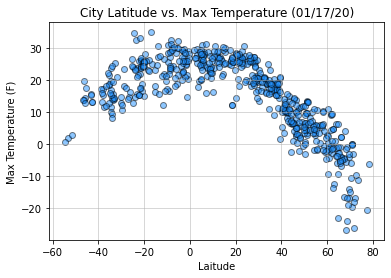

In [34]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "dodgerblue", edgecolor = "black", alpha = 0.5)

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

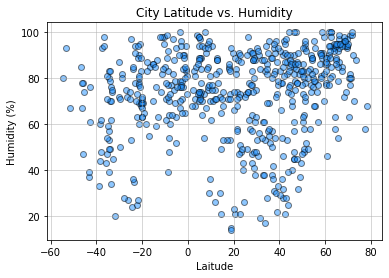

In [35]:
 # Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "dodgerblue", edgecolor = "black", alpha = 0.5)

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

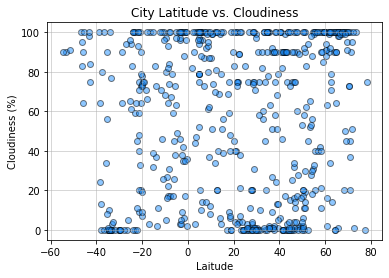

In [36]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "dodgerblue", edgecolor = "black", alpha = 0.5)

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

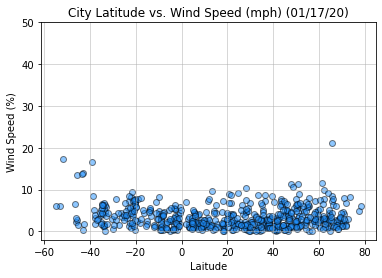

In [37]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "dodgerblue", edgecolor = "black", alpha = 0.5)
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [39]:
northern_df = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_df = weather_dict.loc[weather_dict["Lat"] < 0]   
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Clyde River,73,CA,1635135160,80,70.4692,-68.5914,-10.54,1.90
3,Tuktoyaktuk,95,CA,1635135105,94,69.4541,-133.0374,-4.12,2.71
4,‘Āhuimanu,75,US,1635135160,74,21.4447,-157.8378,26.84,6.69
8,Eureka,100,US,1635135161,78,40.8021,-124.1637,10.97,2.24
9,Palana,85,RU,1635135162,91,59.1167,159.9667,-2.35,4.65


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

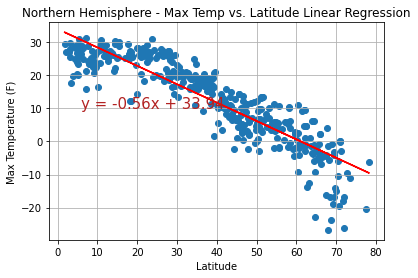

In [40]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/NH Max temp vs Lat LR.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

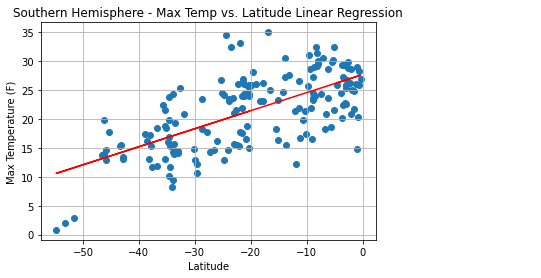

In [41]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/SH Max temp vs Lat LR.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

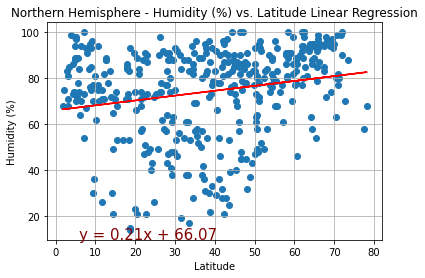

In [42]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="maroon")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/NH - Humidity (%) vs. Lat LR.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

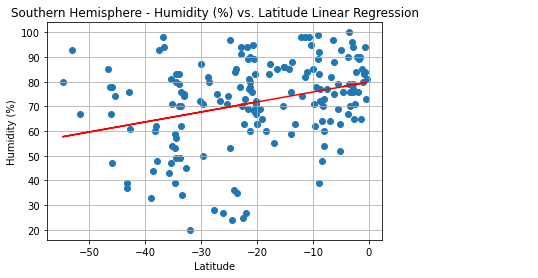

In [43]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="maroon")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/SH - Humidity (%) vs. Lat LR.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

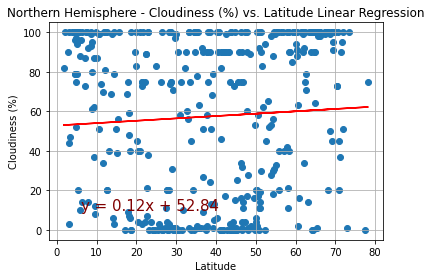

In [44]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="maroon")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/NH - Cloudiness (%) vs. Lat LR.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

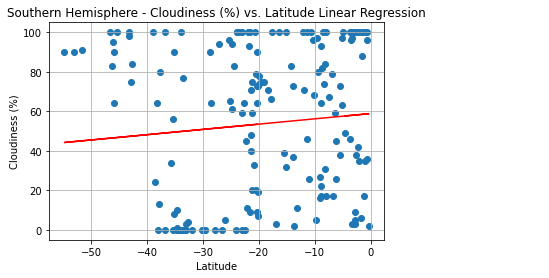

In [45]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="maroon")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/SH - Cloudiness (%) vs. Lat LR.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

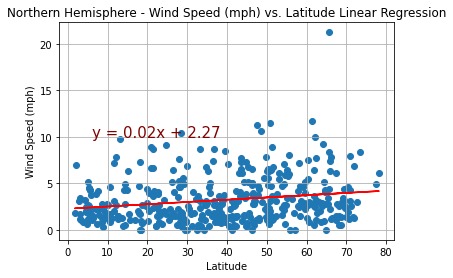

In [46]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="maroon")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/NH - Wind Speed vs. Lat LR.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

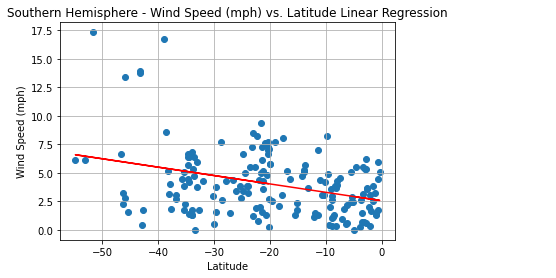

In [47]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="maroon")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/SH - Wind Speed vs. Lat LR.png")
plt.show()